In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas
import numpy as np

%matplotlib inline
import matplotlib.pyplot as ppt
import seaborn

url_draft_years = "http://www.basketball-reference.com/draft/NBA_{year}.html"

all_drafts = pandas.DataFrame()

#combine draft data from 1996 to current to one data frame
for year in range(1996, 2017):
    url = url_draft_years.format(year=year)

    html_from_url = urlopen(url)

    bs = BeautifulSoup(html_from_url, 'html.parser')

    table_row = bs.findAll('tr', limit=2)[1].findAll('th')

    headers = [th.getText() for th in bs.findAll('tr', limit=2)[1].findAll('th')]
    headers.remove('Pk')

    #player data starts after 2nd table record
    player_data_rows = bs.findAll('tr')[2:]

    player_data = [[td.getText() for td in player_data_rows[i].findAll('td')]
                   for i in range(len(player_data_rows))]

    year_data_frame = pandas.DataFrame(player_data, columns=headers)
    year_data_frame.insert(0, 'Draft Year', year)

    all_drafts = all_drafts.append(year_data_frame, ignore_index=True)

# Convert data to proper data types
all_drafts = all_drafts.convert_objects(convert_numeric=True)

#remove any rows that have null data
all_drafts = all_drafts[all_drafts.Player.notnull()]

#fill Not A Numbers to 0 and change some columns to int
all_drafts = all_drafts[:].fillna(0)

# Make header names more readable/clear
all_drafts.rename(columns={'WS/48': 'WS per 48'}, inplace=True)
all_drafts.columns = all_drafts.columns.str.replace('%', '_PERC')

all_drafts.columns.values[13:18] = [all_drafts.columns.values[13:18][col] + " per Game" for col in range(5)]

all_drafts.loc[:,'Yrs':'AST'] = all_drafts.loc[:,'Yrs':'AST'].astype(int)

all_drafts.to_csv("draft_data_1996_to_2016.csv")

draft_df = pandas.read_csv("draft_data_1996_to_2016.csv")

/Users/milankaku/repos/NBAStats/nbastats/lib/python3.6/site-packages/ipykernel/__main__.py:39: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [6]:
draft_df.head()

,Unnamed: 0,Draft Year,Rk,Tm,Player,College,Yrs,G,MP,PTS,...,3P_PERC,FT_PERC per Game,MP per Game,PTS per Game,TRB per Game,AST per Game,WS,WS per 48,BPM,VORP
0,0,1996,1.0,PHI,Allen Iverson,Georgetown University,14,914,37584,24368,...,0.313,0.780,41.1,26.7,3.7,6.2,99.0,0.126,2.7,44.1
1,1,1996,2.0,TOR,Marcus Camby,University of Massachusetts Amherst,17,973,28684,9262,...,0.205,0.670,29.5,9.5,9.8,1.9,81.6,0.137,2.9,35.6
2,2,1996,3.0,VAN,Shareef Abdur-Rahim,University of California,12,830,28882,15028,...,0.297,0.810,34.8,18.1,7.5,2.5,71.2,0.118,0.9,21.1
3,3,1996,4.0,MIL,Stephon Marbury,Georgia Institute of Technology,13,846,31891,16297,...,0.325,0.784,37.7,19.3,3.0,7.6,77.5,0.117,1.2,25.6
4,4,1996,5.0,MIN,Ray Allen,University of Connecticut,18,1300,46344,24505,...,0.400,0.894,35.6,18.9,4.1,3.4,145.1,0.150,3.0,58.1


In [7]:
draft_df.tail()

,Unnamed: 0,Draft Year,Rk,Tm,Player,College,Yrs,G,MP,PTS,...,3P_PERC,FT_PERC per Game,MP per Game,PTS per Game,TRB per Game,AST per Game,WS,WS per 48,BPM,VORP
1235,1277,2016,56.0,DEN,Daniel Hamilton,University of Connecticut,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1236,1278,2016,57.0,MEM,Wang Zhelin,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237,1279,2016,58.0,BOS,Abdel Nader,Iowa State University,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238,1280,2016,59.0,SAC,Isaiah Cousins,University of Oklahoma,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1239,1281,2016,60.0,UTA,Tyrone Wallace,University of California,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
draft_df.dtypes

Unnamed: 0            int64
Draft Year            int64
Rk                  float64
Tm                   object
Player               object
College              object
Yrs                   int64
G                     int64
MP                    int64
PTS                   int64
TRB                   int64
AST                   int64
FG_PERC             float64
3P_PERC             float64
FT_PERC per Game    float64
MP per Game         float64
PTS per Game        float64
TRB per Game        float64
AST per Game        float64
WS                  float64
WS per 48           float64
BPM                 float64
VORP                float64
dtype: object

In [10]:
draft_df.describe()

,Unnamed: 0,Draft Year,Rk,Yrs,G,MP,PTS,TRB,AST,FG_PERC,3P_PERC,FT_PERC per Game,MP per Game,PTS per Game,TRB per Game,AST per Game,WS,WS per 48,BPM,VORP
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,640.703226,2006.100000,30.035484,4.890323,269.500806,6511.154839,2739.287903,1145.702419,576.197581,0.363423,0.204076,0.585918,15.119677,5.896452,2.649839,1.218790,13.949274,0.051144,-2.167742,3.411290
std,370.219688,6.046738,17.070060,4.512836,300.583498,8921.569304,4340.961127,1742.786103,1104.948464,0.177975,0.166914,0.297386,10.434695,5.189922,2.245490,1.441687,25.073003,0.093802,4.074184,9.837811
min,0.000000,1996.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.200000,-1.264000,-53.600000,-8.300000
25%,319.750000,2001.000000,15.000000,1.000000,24.000000,154.750000,44.750000,26.750000,7.000000,0.354000,0.000000,0.550000,6.900000,2.000000,1.000000,0.200000,0.000000,0.000000,-3.800000,-0.400000
50%,641.500000,2006.000000,30.000000,3.000000,139.000000,2114.000000,665.000000,347.500000,124.500000,0.420000,0.268000,0.703000,14.850000,4.700000,2.300000,0.800000,2.200000,0.057000,-1.400000,0.000000
75%,961.250000,2011.000000,45.000000,8.000000,456.250000,10443.250000,3667.000000,1640.000000,588.250000,0.462000,0.343000,0.784000,23.000000,8.600000,3.800000,1.625000,18.525000,0.097000,0.000000,2.425000
max,1281.000000,2016.000000,60.000000,20.000000,1392.000000,48637.000000,33643.000000,15091.000000,10335.000000,1.000000,1.000000,1.000000,41.100000,27.200000,12.800000,9.900000,206.400000,1.367000,19.600000,113.700000


In [11]:
draft_df['Draft Year'] == 1

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1210    False
1211    False
1212    False
1213    False
1214    False
1215    False
1216    False
1217    False
1218    False
1219    False
1220    False
1221    False
1222    False
1223    False
1224    False
1225    False
1226    False
1227    False
1228    False
1229    False
1230    False
1231    False
1232    False
1233    False
1234    False
1235    False
1236    False
1237    False
1238    False
1239    False
Name: Draft Year, dtype: bool

In [12]:
draft_df[draft_df['Draft Year'] == 1996]['WS per 48'].mean()

0.057999999999999996

In [16]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas
import numpy as np

%matplotlib inline
import matplotlib.pyplot as ppt
import seaborn

url_draft_years = "http://www.basketball-reference.com/draft/NBA_{year}.html"

all_drafts = pandas.DataFrame()

#combine draft data from 1996 to current to one data frame
for year in range(1996, 2017):
    url = url_draft_years.format(year=year)

    html_from_url = urlopen(url)

    bs = BeautifulSoup(html_from_url, 'html.parser')

    table_row = bs.findAll('tr', limit=2)[1].findAll('th')

    headers = [th.getText() for th in bs.findAll('tr', limit=2)[1].findAll('th')]
    headers.remove('Pk')

    #player data starts after 2nd table record
    player_data_rows = bs.findAll('tr')[2:]

    player_data = [[td.getText() for td in player_data_rows[i].findAll('td')]
                   for i in range(len(player_data_rows))]

    year_data_frame = pandas.DataFrame(player_data, columns=headers)
    year_data_frame.insert(0, 'Draft_Year', year)

    all_drafts = all_drafts.append(year_data_frame, ignore_index=True)

# Convert data to proper data types
all_drafts = all_drafts.convert_objects(convert_numeric=True)

#remove any rows that have null data
all_drafts = all_drafts[all_drafts.Player.notnull()]

#fill Not A Numbers to 0 and change some columns to int
all_drafts = all_drafts[:].fillna(0)

# Make header names more readable/clear
all_drafts.rename(columns={'WS/48': 'WS_per_48'}, inplace=True)
all_drafts.columns = all_drafts.columns.str.replace('%', '_PERC')

all_drafts.columns.values[13:18] = [all_drafts.columns.values[13:18][col] + "_per_Game" for col in range(5)]

all_drafts.loc[:,'Yrs':'AST'] = all_drafts.loc[:,'Yrs':'AST'].astype(int)

all_drafts.to_csv("draft_data_1996_to_2016.csv")

draft_df = pandas.read_csv("draft_data_1996_to_2016.csv", index_col=0)

/Users/milankaku/repos/NBAStats/nbastats/lib/python3.6/site-packages/ipykernel/__main__.py:39: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [17]:
draft_df.head()

,Draft_Year,Rk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P_PERC,FT_PERC_per_Game,MP_per_Game,PTS_per_Game,TRB_per_Game,AST_per_Game,WS,WS_per_48,BPM,VORP
0,1996,1.0,PHI,Allen Iverson,Georgetown University,14,914,37584,24368,3394,...,0.313,0.780,41.1,26.7,3.7,6.2,99.0,0.126,2.7,44.1
1,1996,2.0,TOR,Marcus Camby,University of Massachusetts Amherst,17,973,28684,9262,9513,...,0.205,0.670,29.5,9.5,9.8,1.9,81.6,0.137,2.9,35.6
2,1996,3.0,VAN,Shareef Abdur-Rahim,University of California,12,830,28882,15028,6239,...,0.297,0.810,34.8,18.1,7.5,2.5,71.2,0.118,0.9,21.1
3,1996,4.0,MIL,Stephon Marbury,Georgia Institute of Technology,13,846,31891,16297,2516,...,0.325,0.784,37.7,19.3,3.0,7.6,77.5,0.117,1.2,25.6
4,1996,5.0,MIN,Ray Allen,University of Connecticut,18,1300,46344,24505,5272,...,0.400,0.894,35.6,18.9,4.1,3.4,145.1,0.150,3.0,58.1


In [18]:
print(draft_df[draft_df['Draft_Year'] == 2014])

      Draft_Year    Rk   Tm                  Player  \
1096        2014   1.0  CLE          Andrew Wiggins   
1097        2014   2.0  MIL           Jabari Parker   
1098        2014   3.0  PHI             Joel Embiid   
1099        2014   4.0  ORL            Aaron Gordon   
1100        2014   5.0  UTA              Dante Exum   
1101        2014   6.0  BOS            Marcus Smart   
1102        2014   7.0  LAL           Julius Randle   
1103        2014   8.0  SAC            Nik Stauskas   
1104        2014   9.0  CHH             Noah Vonleh   
1105        2014  10.0  PHI           Elfrid Payton   
1106        2014  11.0  DEN          Doug McDermott   
1107        2014  12.0  ORL             Dario Saric   
1108        2014  13.0  MIN             Zach LaVine   
1109        2014  14.0  PHO             T.J. Warren   
1110        2014  15.0  ATL           Adreian Payne   
1111        2014  16.0  CHI            Jusuf Nurkic   
1112        2014  17.0  BOS             James Young   
1113      

In [20]:
WS48_yearly_avg = [draft_df[draft_df['Draft_Year'] == year]['WS_per_48'].mean() for yr in draft_df.Draft_Year.unique() ]

In [21]:
WS48_yearly_avg

[0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997,
 0.023399999999999997]

In [22]:
WS48_yearly_avg = [draft_df[draft_df['Draft_Year']==yr]['WS_per_48'].mean()
                 for yr in draft_df.Draft_Year.unique() ]

In [23]:
WS48_yearly_avg.dftype

[0.057999999999999996,
 0.054543859649122804,
 0.075534482758620694,
 0.054379310344827583,
 0.04332758620689655,
 0.045596491228070177,
 0.049368421052631575,
 0.041172413793103449,
 0.04293220338983051,
 0.053916666666666654,
 0.053616666666666674,
 0.051283333333333334,
 0.066633333333333336,
 0.066833333333333328,
 0.046366666666666667,
 0.065100000000000005,
 0.041116666666666662,
 0.049133333333333327,
 0.043966666666666668,
 0.048033333333333338,
 0.023399999999999997]

In [24]:
WS48_yearly_avg = draft_df.groupby('Draft_Year').WS_per_48.mean()

In [25]:
WS48_yearly_avg

Draft_Year
1996    0.058000
1997    0.054544
1998    0.075534
1999    0.054379
2000    0.043328
2001    0.045596
2002    0.049368
2003    0.041172
2004    0.042932
2005    0.053917
2006    0.053617
2007    0.051283
2008    0.066633
2009    0.066833
2010    0.046367
2011    0.065100
2012    0.041117
2013    0.049133
2014    0.043967
2015    0.048033
2016    0.023400
Name: WS_per_48, dtype: float64

In [26]:
type(WS48_yearly_avg)

pandas.core.series.Series

In [27]:
seaborn.set_style("white")

In [28]:
ppt.figure(figsize=(13,10))

In [29]:
x_values = draft_df.Draft_Year.unique()
y_values = WS48_yearly_avg

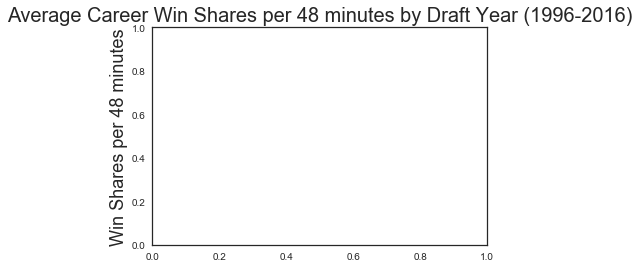

In [30]:
ppt.title('Average Career Win Shares per 48 minutes by Draft Year (1996-2016)', fontsize=20)
ppt.ylabel('Win Shares per 48 minutes', fontsize=18)

(0, 0.1)

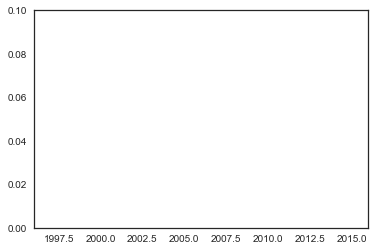

In [36]:
ppt.xlim(1996, 2016)
ppt.ylim(0, .10)

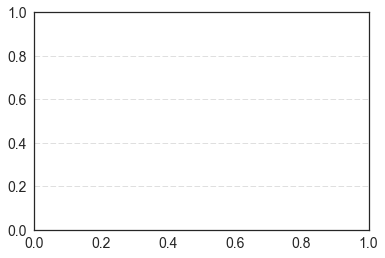

In [32]:
ppt.grid(axis='y', color='grey', linestyle='--', lw=0.5, alpha=0.5)
ppt.tick_params(axis='both', labelsize=14)

In [33]:
seaborn.despine(left=True, bottom=True)

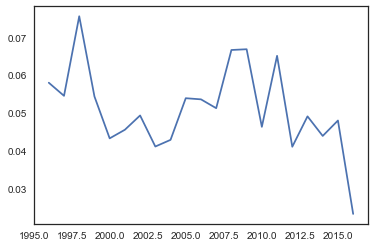

In [44]:
ppt.plot(x_values, y_values)